<a href="https://colab.research.google.com/github/Julia-Vanyarina/data-science/blob/main/%D0%92%D0%B0%D0%BD%D1%8F%D1%80%D0%B8%D0%BD%D0%B0_%D0%AE%D0%BB%D0%B8%D1%8F_04_2_LinearRegression2hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Практическая работа 4-2: Линейная регрессия 2


Name: Ванярина Юлия

Email: VanyarinaYA368@mgpu.ru


## ##  Анализ набора кредитных данных

Вспомните набор данных «Кредит», рассмотренный на занятии и доступный [здесь](http://www-bcf.usc.edu/~gareth/ISL/data.html).
Этот набор данных состоит из информации о кредитных картах 400 человек.

Сначала импортируйте данные и преобразуйте доход в тысячи.

In [3]:
# из библиотеки google.colab импортируем класс files
from google.colab import files

# создаем объект этого класса, применяем метод .upload()
uploaded = files.upload()

Saving Advertising.csv to Advertising.csv
Saving Auto.csv to Auto.csv
Saving Credit.csv to Credit (1).csv


Смоделированный набор данных, содержащий информацию о 400 клиентах.


---


Income: Доход в 1000 долларов

Limit: Кредитный лимит

Rating: Кредитный рейтинг

Cards: Количество кредитных карт

Age: Возраст в годах

Education: Количество лет обучения

Own: Коэффициент с уровнями "Нет " и " Да", указывающий, владеет ли человек домом

Student: Коэффициент с уровнями "Нет " и " Да ", указывающий, является ли данное лицо студентом

Married: Коэффициент с уровнями "Нет " и " Да", указывающий, состоит ли человек в браке

Region: Коэффициент с уровнями Восток, Юг и Запад, указывающий на географическое местоположение человека

Balance: Средний баланс кредитной карты в $

In [10]:
# imports and setup

import scipy as sc
import numpy as np

import pandas as pd
import statsmodels.formula.api as sm     #Last lecture: used statsmodels.formula.api.ols() for OLS
from sklearn import linear_model
import statsmodels.api as sm        #Last lecture: used sklearn.linear_model.LinearRegression() for OLS

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Import data from Credit.csv file
credit = pd.read_csv('Credit.csv',index_col=0) #load data
credit["Income"] = credit["Income"].map(lambda x: 1000*x)
credit

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14891.0,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106025.0,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104593.0,7075,514,4,71,11,Male,No,No,Asian,580
4,148924.0,9504,681,3,36,11,Female,No,No,Asian,964
5,55882.0,4897,357,2,68,16,Male,No,Yes,Caucasian,331
...,...,...,...,...,...,...,...,...,...,...,...
396,12096.0,4100,307,3,32,13,Male,No,Yes,Caucasian,560
397,13364.0,3838,296,5,65,17,Male,No,No,African American,480
398,57872.0,4171,321,5,67,12,Female,No,Yes,Caucasian,138
399,37728.0,2525,192,1,44,13,Male,No,Yes,Caucasian,0


In [11]:
credit['Limit'].describe()

count      400.000000
mean      4735.600000
std       2308.198848
min        855.000000
25%       3088.000000
50%       4622.500000
75%       5872.750000
max      13913.000000
Name: Limit, dtype: float64

In [12]:
credit['Rating'].describe()

count    400.000000
mean     354.940000
std      154.724143
min       93.000000
25%      247.250000
50%      344.000000
75%      437.250000
max      982.000000
Name: Rating, dtype: float64

In [13]:
credit.isna().sum()

Income       0
Limit        0
Rating       0
Cards        0
Age          0
Education    0
Gender       0
Student      0
Married      0
Ethnicity    0
Balance      0
dtype: int64

## Задание 1. Первая регрессионная модель

**Упражнение:** Лимит средств по рейтингу:


$$
\text{Limit} = \beta_0 + \beta_1 \text{Rating}.
$$

Поскольку кредитные рейтинги в основном используются банками для определения кредитных лимитов, ожидаем, что рейтинг будет в прямой зависимости для лимита, поэтому эта регрессия должна быть очень хорошей.

Используйте функцию `ols` из библиотеки Python `statsmodels`. Каково значение $R^2$? Что такое $H_0$ и $H_A$ для соответствующей проверки гипотезы и каково значение $p$?


**Определим гипотезы для этого задания:**


---
Нулевая гипотеза: Рейтинг не влияет на лимит

Альтернативная гипотеза: Рейтинг влияет на лимит


Rating - независимая переменная,Limit - зависимая переменная

                            OLS Regression Results                            
Dep. Variable:                  Limit   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 6.348e+04
Date:                Sat, 25 May 2024   Prob (F-statistic):               0.00
Time:                        12:30:47   Log-Likelihood:                -2649.1
No. Observations:                 400   AIC:                             5302.
Df Residuals:                     398   BIC:                             5310.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -542.9282     22.850    -23.760      0.0

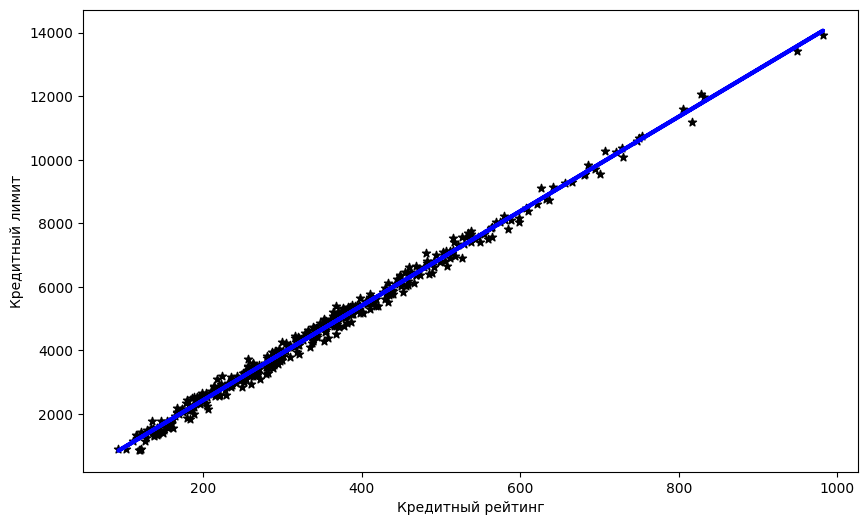

In [23]:
model = smf.ols('Limit ~ Rating', data=credit).fit()
summary = model.summary()


r_2 = model.rsquared
p_value = model.pvalues['Rating']

print(summary)
print(f'R квадрат: {r_2}')
print(f'p-value для Rating: {p_value}')

plt.scatter(x=credit['Rating'],y=credit['Limit'],c='k',marker='*',label='Rating')
plt.plot(credit['Rating'],model.predict(),color='blue',linewidth=3)

plt.xlabel('Кредитный рейтинг')
plt.ylabel('Кредитный лимит')
plt.show()

**Ваш ответ:** Отвергаем нулевую гипотезу, так как значение р = 0.0 < 0.05; значение r2 99%,значит что 99% изменчивости лимита объясняется рейтингом.
**Рейтинг влияет на лимит средств**

## Задание 2: Прогнозирование лимита без рейтинга

Поскольку `Рейтинг` и `Лимит` — это практически одна и та же переменная, исключим `Рейтинг` и просто попробуем спрогнозировать `Лимит` на основе вещественнозначных переменных (некатегориальных переменных): Доход, Карты, Возраст, Образование, Баланс.

**Упражнение.** Разработайте модель множественной линейной регрессии для прогнозирования рейтинга. Интерпретируйте результаты.

А пока просто сосредоточьтесь на переменных с численными значениями (доход, карты, возраст, образование, баланс).

В первом приближении не использовать категориальные переменные (Пол, Студент, Семейное положение, Этническая принадлежность).



In [25]:
mult_reg = credit[['Income', 'Cards', 'Age', 'Education', 'Balance', 'Limit']]

model = smf.ols('Limit ~ Income + Cards + Age + Education + Balance', data=mult_reg).fit()

summary = model.summary()
print(summary)


                            OLS Regression Results                            
Dep. Variable:                  Limit   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     1242.
Date:                Sat, 25 May 2024   Prob (F-statistic):          1.32e-238
Time:                        12:34:20   Log-Likelihood:                -3101.0
No. Observations:                 400   AIC:                             6214.
Df Residuals:                     394   BIC:                             6238.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1752.3883    170.621     10.271      0.0

По р значению можно сделать вывод о том,что Age и Education не имеют статистического значения

Проверим оставшиеся пременные отдельно

                            OLS Regression Results                            
Dep. Variable:                  Limit   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     670.2
Date:                Sat, 25 May 2024   Prob (F-statistic):           2.39e-87
Time:                        13:58:18   Log-Likelihood:                -3467.3
No. Observations:                 400   AIC:                             6939.
Df Residuals:                     398   BIC:                             6947.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2389.8694    114.829     20.812      0.0

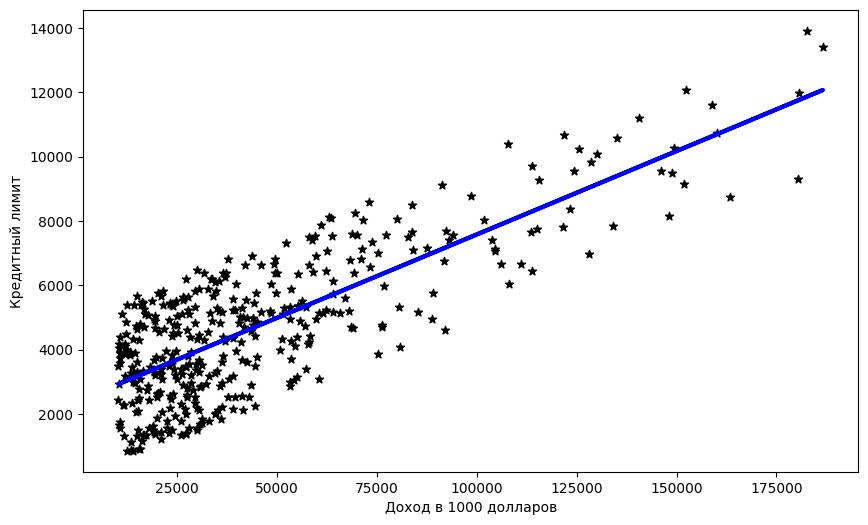

In [29]:
model_Income = smf.ols('Limit ~ Income', data=credit).fit()
summary = model_Income.summary()


r_2 = model_Income.rsquared
p_value = model_Income.pvalues['Income']

print(summary)
print(f'R квадрат: {r_2}')
print(f'p-value для Income: {p_value}')

plt.scatter(x=credit['Income'],y=credit['Limit'],c='k',marker='*',label='Income')
plt.plot(credit['Income'],model_Income.predict(),color='blue',linewidth=3)

plt.xlabel('Доход в 1000 долларов')
plt.ylabel('Кредитный лимит')
plt.show()

                            OLS Regression Results                            
Dep. Variable:                  Limit   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                   0.04167
Date:                Sat, 25 May 2024   Prob (F-statistic):              0.838
Time:                        14:02:43   Log-Likelihood:                -3664.7
No. Observations:                 400   AIC:                             7333.
Df Residuals:                     398   BIC:                             7341.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4684.6662    274.978     17.037      0.0

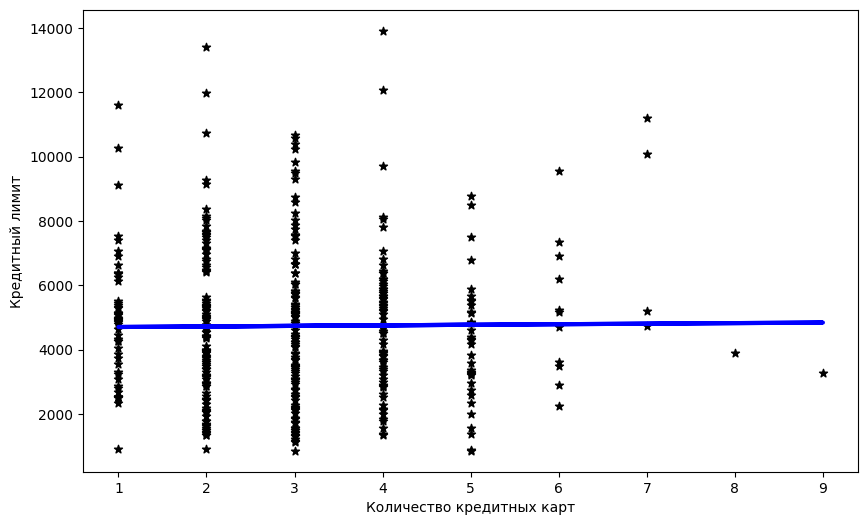

In [33]:
model_Cards = smf.ols('Limit ~ Cards', data=credit).fit()
summary = model_Cards.summary()


r_2 = model_Cards.rsquared
p_value = model_Cards.pvalues['Cards']

print(summary)
print(f'R квадрат: {r_2}')
print(f'p-value для Cards: {p_value}')

plt.scatter(x=credit['Cards'],y=credit['Limit'],c='k',marker='*',label='Cards')
plt.plot(credit['Cards'],model_Cards.predict(),color='blue',linewidth=3)

plt.xlabel('Количество кредитных карт')
plt.ylabel('Кредитный лимит')
plt.show()

                            OLS Regression Results                            
Dep. Variable:                  Limit   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     1148.
Date:                Sat, 25 May 2024   Prob (F-statistic):          2.53e-119
Time:                        14:02:19   Log-Likelihood:                -3393.4
No. Observations:                 400   AIC:                             6791.
Df Residuals:                     398   BIC:                             6799.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2485.9566     88.586     28.063      0.0

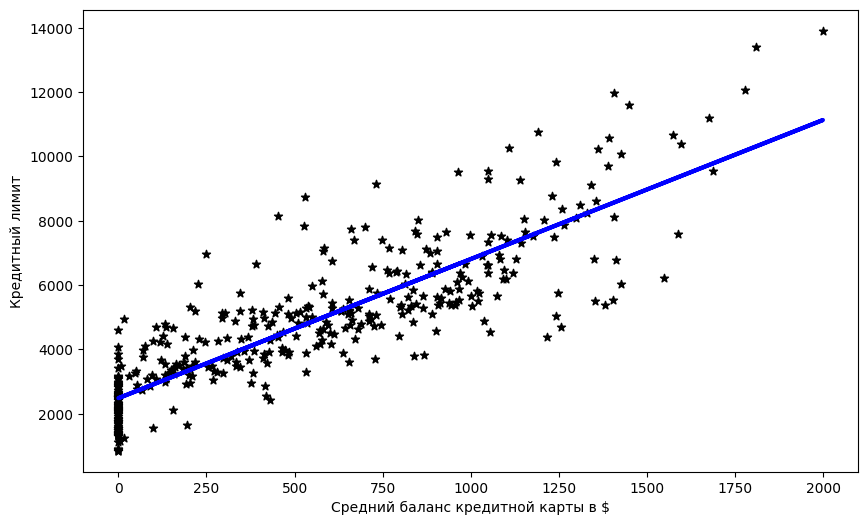

In [32]:
model_Balance = smf.ols('Limit ~ Balance', data=credit).fit()
summary = model_Balance.summary()


r_2 = model_Balance.rsquared
p_value = model_Balance.pvalues['Balance']

print(summary)
print(f'R квадрат: {r_2}')
print(f'p-value для Balance: {p_value}')

plt.scatter(x=credit['Balance'],y=credit['Limit'],c='k',marker='*',label='Balance')
plt.plot(credit['Balance'],model_Balance.predict(),color='blue',linewidth=3)

plt.xlabel('Средний баланс кредитной карты в $')
plt.ylabel('Кредитный лимит')
plt.show()

**R-квадрат для переменной Income: равен 0.6274, что означает, что около 62.74% изменчивости зависимой переменной объясняется моделью.
p-значение для переменной Income составляет 2.39e-87, что является крайне низким значением.
модель с переменной Balance объясняет 74.25% изменчивости зависимой переменной и показывает статистическую значимость этого предиктора, в то время как вторая модель с переменной 'Cards' объясняет очень малую часть изменчивости (0.01%) и этот предиктор не является статистически значимым.
Делаем вывод что переменные Income и Balance статистически значимы**


                            OLS Regression Results                            
Dep. Variable:                  Limit   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     3046.
Date:                Sat, 25 May 2024   Prob (F-statistic):          1.37e-241
Time:                        15:16:19   Log-Likelihood:                -3106.0
No. Observations:                 400   AIC:                             6218.
Df Residuals:                     397   BIC:                             6230.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1610.3665     49.710     32.395      0.0

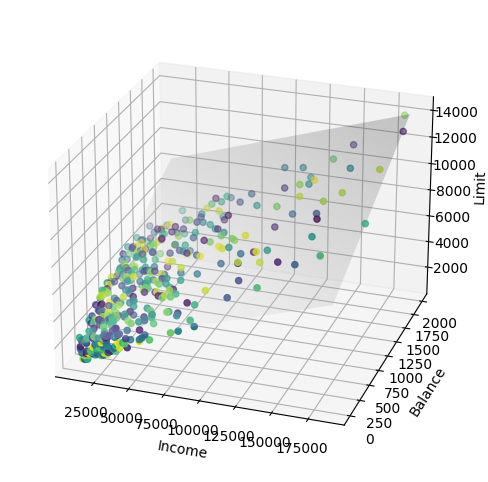

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.formula.api as smf
from matplotlib import cm

mult_reg2 = credit[['Income','Balance', 'Limit']]

model_2 = smf.ols('Limit ~ Income + Balance', data=mult_reg2).fit()

summary = model_2.summary()
print(summary)

# Инициализация фигуры и осей для 3-D графика:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Создание 3-D диаграммы рассеяния данных:
colors = np.linspace(0, 1, len(mult_reg2))  # Generate colors from 0 to 1
ax.scatter(xs=mult_reg2['Income'], ys=mult_reg2['Balance'], zs=mult_reg2['Limit'], c=colors, cmap='viridis')

# Построение поверхностного графика предсказанной переменной
x = np.linspace(mult_reg2['Income'].min(), mult_reg2['Income'].max(), 100)
y = np.linspace(mult_reg2['Balance'].min(), mult_reg2['Balance'].max(), 100)
X, Y = np.meshgrid(x, y)  # Создание значений для независимых переменных
par = dict(model_2.params)  # Составление словаря из коэффициентов регрессионной модели
Z = par["Intercept"] + par["Income"]*X + par["Balance"]*Y

surf = ax.plot_surface(X, Y, Z, cmap='Greys', alpha=0.2)  # alpha<1 делает график поверхности прозрачным

# Поворот и маркировка осей:
ax.view_init(25, -71)
ax.set_xlabel('Income')
ax.set_ylabel('Balance')
ax.set_zlabel('Limit')

plt.show()



Какие независимые переменные являются хорошими/плохими предикторами? Какая модель в целом является лучшей?

**Ваш ответ:**


Хорошими предикторами явдяются Income и Balance, плохими - Age, Cards, Education

## Задание 3. Включение категориальных переменных в модель регрессии

Рассмотреть двоичные категориальные переменные, которые были ранее сопоставлены с целочисленными значениями 0, 1 в в `лекции 4.2`.

In [46]:
credit["Gender_num"] = credit["Gender"].map({' Male':0, 'Female':1})
credit["Student_num"] = credit["Student"].map({'Yes':1, 'No':0})
credit["Married_num"] = credit["Married"].map({'Yes':1, 'No':0})

Можете ли улучшить модель, которая разработана в задании `2`, включив в нее одну или несколько из этих переменных?


In [53]:
mult_kategor = credit[['Income', 'Gender_num', 'Student_num', 'Married_num', 'Balance', 'Limit']]

model = smf.ols('Limit ~ Income + Gender_num + Student_num + Married_num + Balance', data=mult_kategor).fit()

summary = model.summary()
print(summary)




                            OLS Regression Results                            
Dep. Variable:                  Limit   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     2924.
Date:                Sat, 25 May 2024   Prob (F-statistic):          7.24e-309
Time:                        15:47:46   Log-Likelihood:                -2936.7
No. Observations:                 400   AIC:                             5885.
Df Residuals:                     394   BIC:                             5909.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1638.9094     44.483     36.844      

По результатам из множественной регресси можем исключить переменные Gender_num и Married_num так как значение р у них слишком большое.

In [52]:
mult_kategor_2 = credit[['Income',  'Student_num',  'Balance', 'Limit']]

model = smf.ols('Limit ~ Income +  Student_num  + Balance', data=mult_kategor_2).fit()

summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                  Limit   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     4875.
Date:                Sat, 25 May 2024   Prob (F-statistic):          3.55e-312
Time:                        15:47:43   Log-Likelihood:                -2937.6
No. Observations:                 400   AIC:                             5883.
Df Residuals:                     396   BIC:                             5899.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1671.8940     32.784     50.998      

С переменной

Student_num  модель повысила коэффициент детерминации с 0,939 до 0,974,что показывает значимость переменной Student_num



**Ваш ответ:**

**Если сравнивать первую и вторую модель по коэффициенту детерминации,то первая будет более удачная,но мы там рассматриваем линейную регрессию двух переменных,что может считаться неполной картиной.Если рассматривать 2 и 3 модель множественных регрессий,то 3 модель является более точной.В итоге,на мой взгляд, 3 модель является лучшей**